In [1]:
import xarray as xr
import numpy as np
from scipy import spatial

In [3]:
f = '../example_data/GLDAS/FORCING/2019022600.LDASIN_DOMAIN1'
ds = xr.open_dataset(f)
lat = 21.241737
lon = -158.28706
variable = 'RAINRATE'

In [4]:
# get lat, lon, and var as numpy arrays
lats = ds.lat.values
lons = ds.lon.values
vals = ds[variable].values

In [5]:
A = np.stack((np.ravel(lons), np.ravel(lats)), axis=-1)
KDTree = spatial.KDTree(A)

In [6]:
def nearest_coord(KDTree, pt):
    distance, idx = KDTree.query(pt)
    return (distance, idx)

In [7]:
distance, idx = nearest_coord(KDTree, (lon, lat))
i, j = np.unravel_index(idx, lons.shape)

In [25]:
# insert data
vals[0][i][j] = 10




# insert at i, j
#ds[variable].values = vals

In [13]:
# after all data has been inserted, interpolate

## interporate the data
here is where to start, not working for now

In [20]:
from scipy.interpolate import griddata
import matplotlib
import matplotlib.pyplot as plt

In [21]:
vals2d = vals[0]
pts = np.argwhere(~np.isnan(vals2d))
dat = [vals2d[tuple(pt)] for pt in pts]

In [22]:
x = np.linspace(0, 55, 56)
y = np.linspace(0, 71, 72)
X, Y = np.meshgrid(x, y)

grid = griddata(pts, dat, (X, Y), method='cubic')

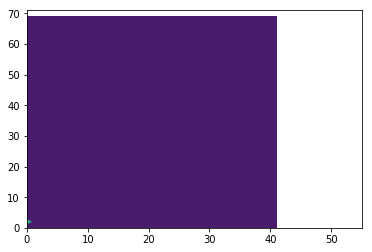

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.contourf(X, Y, grid)
plt.show()